In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Episode Generator

In [2]:
def generate_episode():
    # [sum, aces]
    player = [[0, 0]]
    dealer = [[0, 0]]
    dealer_faceup = 0

    # player
    for i in range(2):
        card = np.random.randint(1, 14)
        if card == 1: ## ace
            player.append([player[-1][0] + 11, player[-1][1] + 1])
        else:
            player.append([player[-1][0] + min(10, card), player[-1][1]])

    # dealer
    for i in range(2):
        card = np.random.randint(1, 14)

        if card == 1: ## ace
            dealer.append([dealer[-1][0] + 11, dealer[-1][1] + 1])
        else:
            dealer.append([dealer[-1][0] + min(10, card), dealer[-1][1]])

        if i == 0:
            dealer_faceup = min(card, 10)

    if player[-1][0] > 21:
        player[-1][0] -= 10
        player[-1][1] -= 1

    if dealer[-1][0] > 21:
        dealer[-1][0] -= 10
        dealer[-1][1] -= 1

    while True:
        if player[-1][0] >= 20:
            break

        card = np.random.randint(1, 14)
        if card == 1: ## ace
            player.append([player[-1][0] + 11, player[-1][1] + 1])
        else:
            player.append([player[-1][0] + min(10, card), player[-1][1]])

        if player[-1][0] > 21:
            if player[-1][1] > 0:
                player[-1][0] -= 10
                player[-1][1] -= 1
            else: break

    if player[-1][0] >= 21:
        return player, dealer, dealer_faceup

    while True:
        if dealer[-1][0] >= 17:
            break

        card = np.random.randint(1, 14)
        if card == 1: ## ace
            dealer.append([dealer[-1][0] + 11, dealer[-1][1] + 1])
        else:
            dealer.append([dealer[-1][0] + min(10, card), dealer[-1][1]])

        if dealer[-1][0] > 21:
            if dealer[-1][1] > 0:
                dealer[-1][0] -= 10
                dealer[-1][1] -= 1
            else: break

    return player, dealer, dealer_faceup

## Value estimation

In [3]:
def get_value_estimation(episodes):
    # state: [
    #   player sum:             0 --> 12, 1 --> 13, ..., 9 --> 21
    #   dealer showing card:    0 --> 1, ..., 9 --> 10
    #   usable ace:             0 --> NO, 1 --> YES
    # ]

    ## state --> [player sum, dealer face up card, player usable ace]
    state_values = np.zeros([2, 10, 10], dtype='f')
    state_frequencies = np.zeros([2, 10, 10], dtype='int')

    rewards = 0
    for i in range(episodes):
        player, dealer, dealer_faceup = generate_episode()
        reward = 0

        ## bust
        if player[-1][0] > 21:
            reward = -1
        elif dealer[-1][0] > 21:
            reward = 1

        ## win
        elif player[-1][0] > dealer[-1][0]:
            reward = 1
        elif player[-1][0] < dealer[-1][0]:
            reward = -1

        for i in range(1, len(player)):
            if player[i][0] < 12:
                continue
            if player[i][0] > 21:
                break
            usable_ace = min(1, player[i][1])
            # print(player[i][0] - 12, dealer_faceup - 1, usable_ace)
            state_frequencies[usable_ace][player[i][0] - 12][dealer_faceup - 1] += 1
            state_values[usable_ace][player[i][0] - 12][dealer_faceup - 1] += reward

    values = state_values / state_frequencies
    return values

In [6]:
def plot_value_esitmates(episodes):
    values = get_value_estimation(episodes)
    # Set up grid and test data
    nx, ny = 10, 10
    x = range(nx)
    y = range(ny)

    hf = plt.figure()
    plot1 = hf.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
    plot1.plot_surface(X, Y, values[0])
    plt.title("No usable ace, {} episodes".format(episodes))
    plt.xlabel("Player sum")
    plt.ylabel("Dealer showing")
    plt.show()

    hf = plt.figure()
    plot2 = hf.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
    plot2.plot_surface(X, Y, values[1])
    plt.title("Usable ace, {} episodes".format(episodes))
    plt.xlabel("Player sum")
    plt.ylabel("Dealer showing")

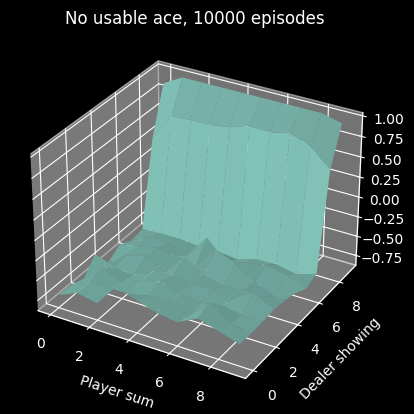

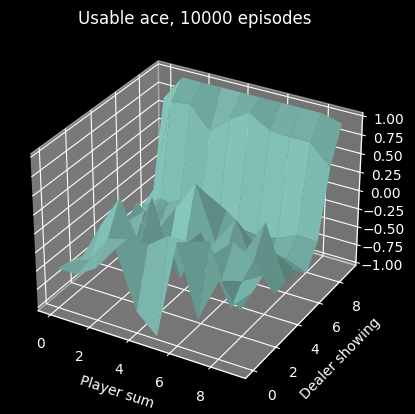

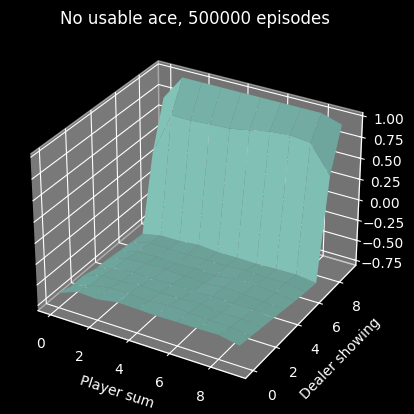

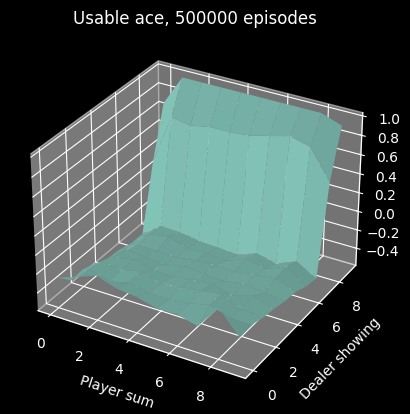

In [7]:
plot_value_esitmates(10000)
plot_value_esitmates(500000)